In [1]:
import numpy as np 
import pandas as pd
import cmath 
import matplotlib.pyplot as plt
import glob
plt.style.use('dark_background')

In [25]:
def loader(baseline_filename, disk_res_filename): 
    folder_path = '/Users/FTS/Desktop/whispering_gallery/data_test/'
    baseline_data = pd.read_csv(folder_path + baseline_filename)
    baseline_data['Complex (decimal)'] = baseline_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    disk_resonance_data = pd.read_csv(folder_path + disk_res_filename)
    disk_resonance_data['Complex (decimal)'] = disk_resonance_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    return baseline_data, disk_resonance_data


In [49]:
strip_baseline, disk_strip = loader('no_disk1601_singleTrace_test1_2025-05-16_12-01-25_PWR-15to5dB.txt', 'w_disk1601_singleTrace_test1_2025-05-16_12-00-03_PWR-15to5dB.txt') 

In [27]:
disk_strip

,Unnamed: 0,Freq (Hz),Complex (decimal)
0,0,1.200000e+08,-0.000356+0.000009j
1,1,1.261000e+08,-0.000407+0.000247j
2,2,1.322000e+08,-0.000192+0.000435j
3,3,1.383000e+08,0.000027+0.000442j
4,4,1.444000e+08,0.000339+0.000362j
...,...,...,...
1596,1596,9.855600e+09,0.086449-0.095360j
1597,1597,9.861700e+09,0.013817-0.112595j
1598,1598,9.867800e+09,-0.047562-0.127853j
1599,1599,9.873900e+09,-0.121422-0.061775j


In [28]:
strip_baseline

,Unnamed: 0,Freq (Hz),Complex (decimal)
0,0,1.200000e+08,-0.000262-0.000015j
1,1,1.261000e+08,-0.000332+0.000249j
2,2,1.322000e+08,-0.000249+0.000404j
3,3,1.383000e+08,0.000101+0.000439j
4,4,1.444000e+08,0.000419+0.000376j
...,...,...,...
1596,1596,9.855600e+09,0.133728-0.013611j
1597,1597,9.861700e+09,0.097328-0.095222j
1598,1598,9.867800e+09,0.018715-0.134804j
1599,1599,9.873900e+09,-0.066986-0.116058j


C:\Users\FTS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\FTS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'S21')

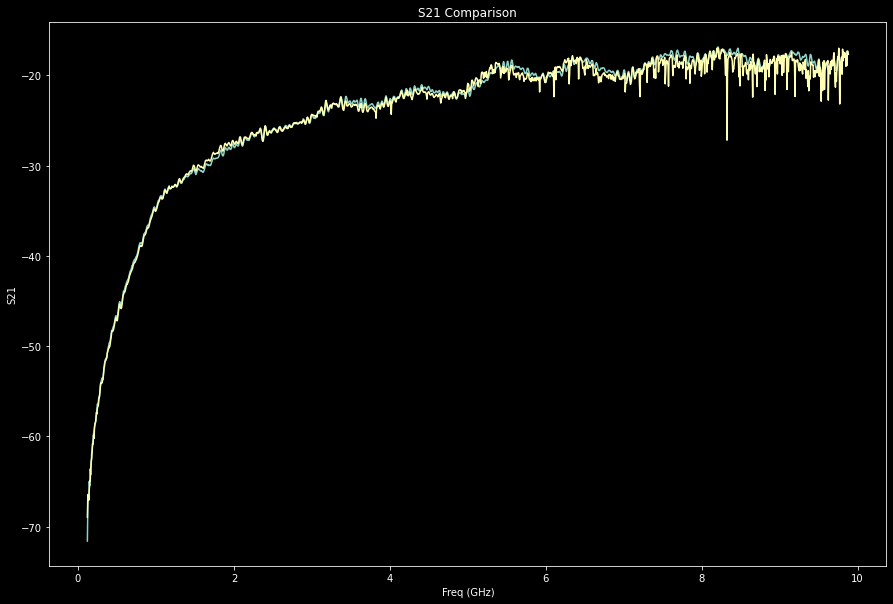

In [65]:
plt.figure(figsize = (15,10))
plt.title('S21 Comparison')
plt.plot(1e-9*strip_baseline['Freq (Hz)'], 20*np.log10((strip_baseline['Complex (decimal)'])), label = 'baseline')
plt.plot(1e-9*disk_strip['Freq (Hz)'], 20*np.log10((disk_strip['Complex (decimal)'])), label = 'disk-strip')
plt.xlabel('Freq (GHz)')
plt.ylabel('S21')

Text(0, 0.5, 'S21')

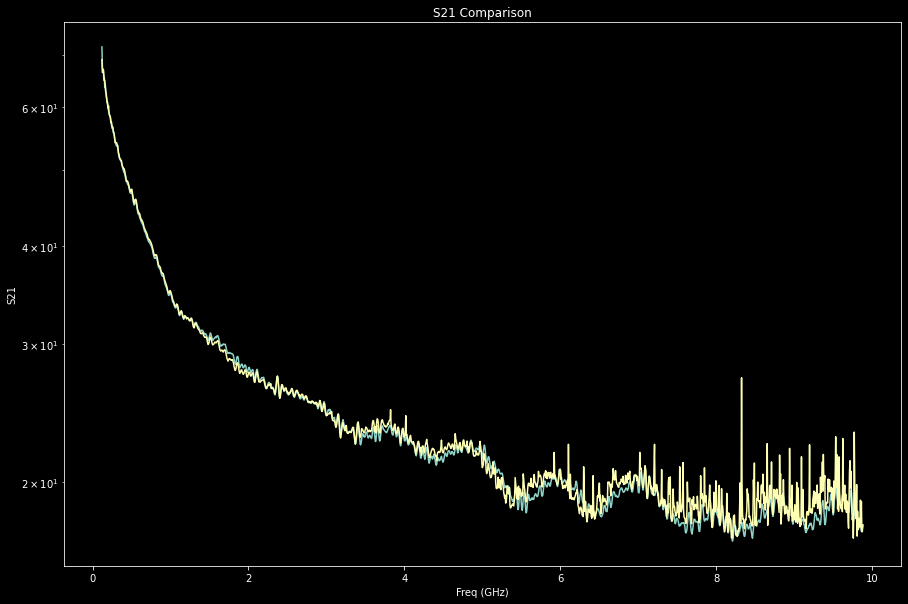

In [34]:
plt.figure(figsize = (15,10))
plt.title('S21 Comparison')
plt.semilogy(1e-9*strip_baseline['Freq (Hz)'], np.abs(20*np.log10(np.abs(strip_baseline['Complex (decimal)']))), label = 'baseline')
plt.semilogy(1e-9*disk_strip['Freq (Hz)'], np.abs(20*np.log10(np.abs(disk_strip['Complex (decimal)']))), label = 'disk-strip')
plt.xlabel('Freq (GHz)')
plt.ylabel('S21')

Text(0, 0.5, 'S21')

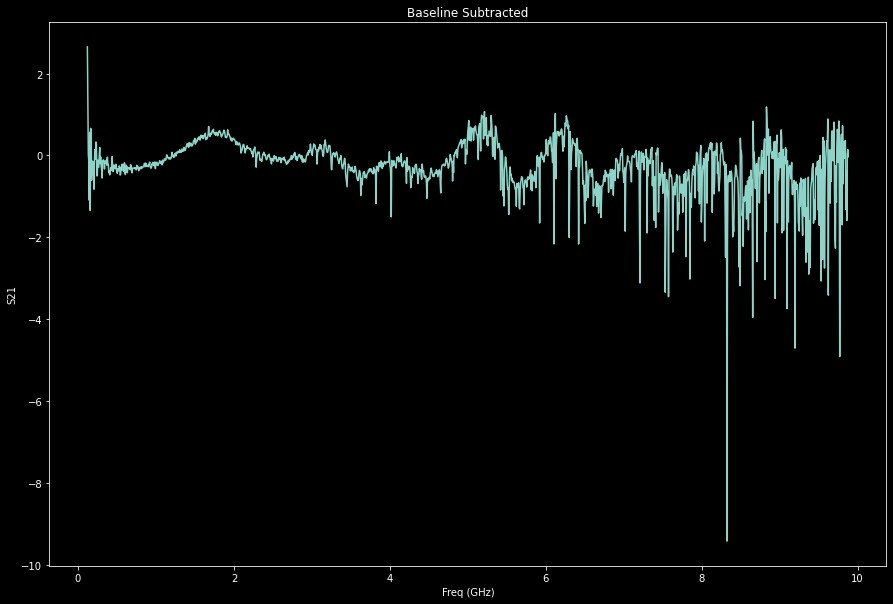

In [46]:
plt.figure(figsize = (15,10))
plt.title('Baseline Subtracted')
plt.plot(1e-9*strip_baseline['Freq (Hz)'], 20*np.log10(np.abs(disk_strip['Complex (decimal)'])) 
                                                       - 20*np.log10(np.abs(strip_baseline['Complex (decimal)'])), label = 'disk - baseline')
                                                       
plt.xlabel('Freq (GHz)')
plt.ylabel('S21')                            

Text(0, 0.5, 'S21')

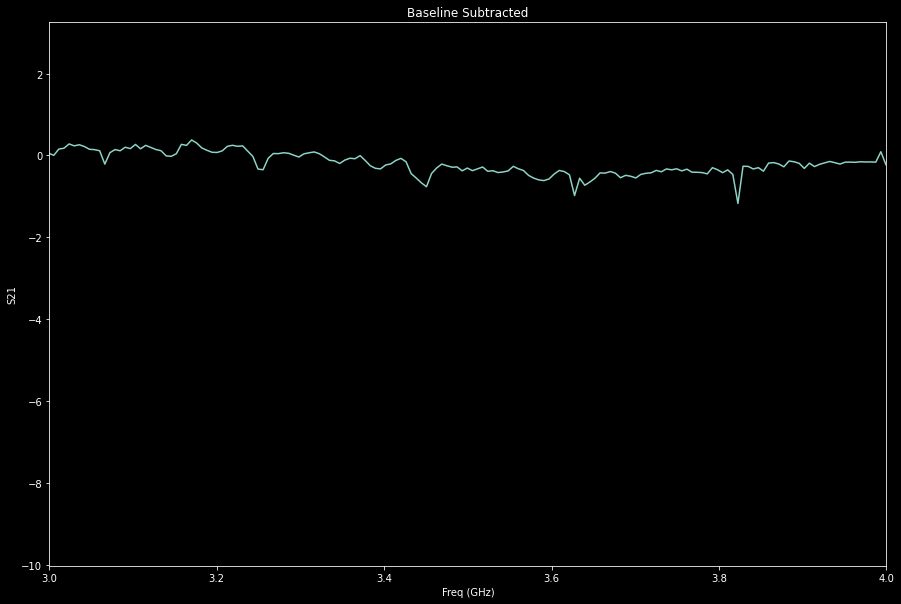

In [48]:
plt.figure(figsize = (15,10))
plt.title('Baseline Subtracted')
plt.plot(1e-9*strip_baseline['Freq (Hz)'], 20*np.log10(np.abs(disk_strip['Complex (decimal)'])) 
                                                       - 20*np.log10(np.abs(strip_baseline['Complex (decimal)'])), label = 'disk - baseline')
plt.xlim(3, 4)
plt.xlabel('Freq (GHz)')
plt.ylabel('S21')            

In [62]:
def loader_plotter(baseline_filename, disk_res_filename): 
    folder_path = '/Users/FTS/Desktop/whispering_gallery/data_test/'
    baseline_data = pd.read_csv(folder_path + baseline_filename)
    baseline_data['Complex (decimal)'] = baseline_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    disk_resonance_data = pd.read_csv(folder_path + disk_res_filename)
    disk_resonance_data['Complex (decimal)'] = disk_resonance_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    
    fig, ax = plt.subplots(1, 2, figsize = (20,10))
    ax[0].set_title('S21 Comparison')
    ax[0].plot(1e-9*strip_baseline['Freq (Hz)'], 20*np.log10(np.abs(strip_baseline['Complex (decimal)'])), label = 'baseline')
    ax[0].plot(1e-9*disk_strip['Freq (Hz)'], 20*np.log10(np.abs(disk_strip['Complex (decimal)'])), label = 'disk-strip')
    ax[0].legend()
               
    ax[1].set_title('S21, Baseline Subtracted')
    ax[1].plot(1e-9*strip_baseline['Freq (Hz)'], 
                20*np.log10(np.abs(disk_strip['Complex (decimal)']))-20*np.log10(np.abs(strip_baseline['Complex (decimal)'])), label = 'disk - baseline')
    ax[1].legend()
    
    plt.setp(ax, xlabel = 'Freq (GHz)', ylabel = 'S21 (dB)')
    
    return baseline_data, disk_resonance_data

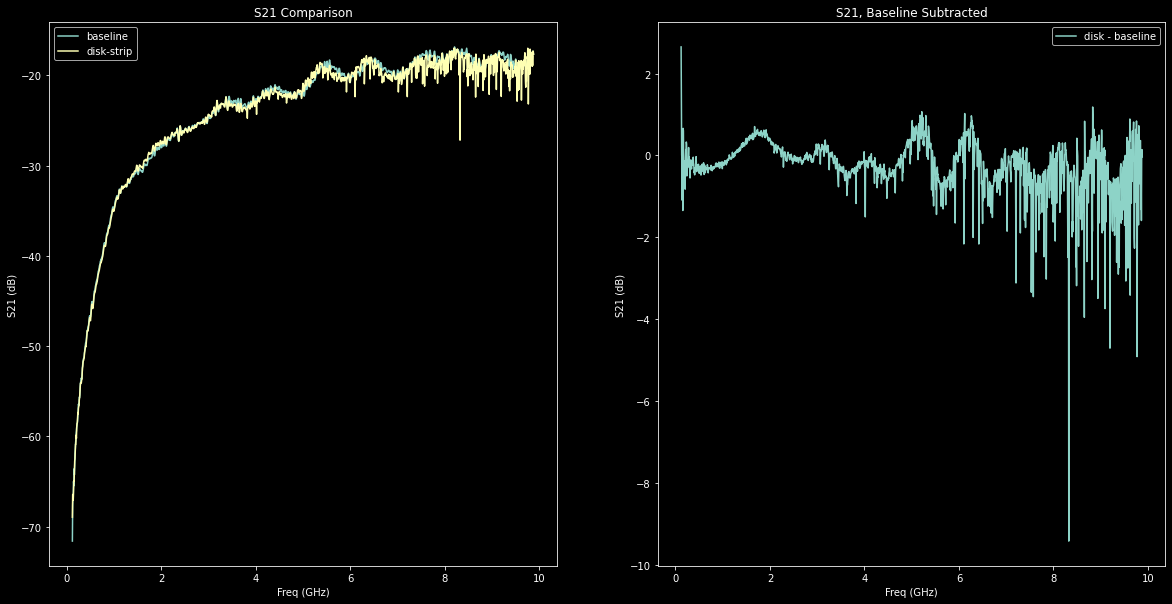

In [64]:
test, test1 = loader_plotter('no_disk1601_singleTrace_test1_2025-05-16_12-01-25_PWR-15to5dB.txt', 'w_disk1601_singleTrace_test1_2025-05-16_12-00-03_PWR-15to5dB.txt') 